##Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Load the CSV files
customer_interactions = pd.read_csv('customer_interactions.csv')
purchase_history = pd.read_csv('purchase_history.csv', delimiter=';')
product_details = pd.read_csv('product_details.csv',delimiter=';')

In [3]:
# Print column names for each DataFrame
print("Customer Interactions columns:", customer_interactions.columns)
print("Purchase History columns:", purchase_history.columns)
print("Product Details columns:", product_details.columns)

Customer Interactions columns: Index(['customer_id', 'page_views', 'time_spent'], dtype='object')
Purchase History columns: Index(['customer_id', 'product_id', 'purchase_date', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
Product Details columns: Index(['product_id', 'category', 'price', 'ratings', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [4]:
customer_interactions

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [5]:
# Select only the relevant columns
purchase_history = purchase_history[['customer_id', 'product_id', 'purchase_date']]
purchase_history

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
5,5,101,2023-01-05


In [6]:
# Select only the relevant columns
product_details = product_details[['product_id', 'category', 'price', 'ratings']]
product_details

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [7]:
# Data Exploration and Preprocessing:

# Check the structure and basic statistics of each dataset
print("Customer Interactions Dataset:")
print(customer_interactions.info())
print(customer_interactions.describe())

print("\nPurchase History Dataset:")
print(purchase_history.info())
print(purchase_history.describe())

print("\nProduct Details Dataset:")
print(product_details.info())
print(product_details.describe())

Customer Interactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  5 non-null      int64
 1   page_views   5 non-null      int64
 2   time_spent   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes
None
       customer_id  page_views  time_spent
count     5.000000     5.00000    5.000000
mean      3.000000    22.40000  110.000000
std       1.581139     5.59464   27.386128
min       1.000000    15.00000   80.000000
25%       2.000000    20.00000   90.000000
50%       3.000000    22.00000  110.000000
75%       4.000000    25.00000  120.000000
max       5.000000    30.00000  150.000000

Purchase History Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    6

In [8]:
# Merge Customer Interactions and Purchase History on 'Customer ID'
merged_data = pd.merge(customer_interactions, purchase_history, on='customer_id', how='left')

# Merge the result with Product Details on 'Product ID'
combined_data = pd.merge(merged_data, product_details, on='product_id', how='left')

# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [9]:
print("combined_data columns:", combined_data.columns)

combined_data columns: Index(['customer_id', 'page_views', 'time_spent', 'product_id',
       'purchase_date', 'category', 'price', 'ratings'],
      dtype='object')


In [10]:
combined_data

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [11]:
# Check the structure and basic statistics of the combined dataset
print("Combined Data:")
print(combined_data.info())
print(combined_data.describe())

Combined Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    6 non-null      int64  
 1   page_views     6 non-null      int64  
 2   time_spent     6 non-null      int64  
 3   product_id     6 non-null      int64  
 4   purchase_date  6 non-null      object 
 5   category       6 non-null      object 
 6   price          6 non-null      int64  
 7   ratings        6 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 432.0+ bytes
None
       customer_id  page_views  time_spent  product_id       price   ratings
count     6.000000    6.000000    6.000000    6.000000    6.000000  6.000000
mean      2.666667   22.833333  111.666667  102.666667  346.666667  4.300000
std       1.632993    5.115336   24.832774    1.632993  304.083322  0.368782
min       1.000000   15.000000   80.000000  101.000000   30.00000

In [14]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:00


In [15]:
#Data Creation
from faker import Faker
fake = Faker()
new_data = []

for _ in range(994):
    new_data.append({
        'customer_id': np.random.randint(1, 21),
        'page_views': np.random.randint(5, 50),
        'time_spent': np.random.randint(30, 300),
        'product_id': np.random.randint(101, 200),
        'purchase_date': fake.date_between(start_date='-365d', end_date='today'),
        'category': fake.random_element(elements=("Product A", "Essential Item", "Everyday Accessory", "Premium Selection", "Classic Product", "Versatile Tool", "Universal Solution", "Modern Gadget", "Practical Item", "Timeless Piece", "Quality Essential", "Popular Choice", "Innovative Device", "Functional Gear", "Fashionable Item", "Household Staple", "Must-Have Product", "Time-saving Tool", "Eco-friendly Option", "Multipurpose Item"
)),
        'price': np.random.randint(20, 1000),
        'ratings': round(np.random.uniform(3.0, 5.0), 1)
    })

# Concatenate the new data to the original DataFrame
df = pd.concat([combined_data, pd.DataFrame(new_data)], ignore_index=True)

In [ ]:
df.info()

In [17]:
# Save the fake data to a new CSV file
df.to_csv('fake_data.csv', index=False)

In [18]:
df

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
...,...,...,...,...,...,...,...,...
995,12,31,280,117,2023-10-11,Must-Have Product,285,3.9
996,10,14,286,199,2023-08-01,Classic Product,723,3.2
997,8,47,86,135,2023-09-29,Popular Choice,742,4.3
998,7,5,40,182,2023-03-24,Product A,330,4.0


##Data Exploration and Preprocessing

###Explore the provided dataset to understand the characteristics of customer interactions and purchase history.

In [19]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   customer_id  page_views  time_spent  product_id purchase_date  \
0            1          25         120         101    2023-01-01   
1            1          25         120         105    2023-01-05   
2            2          20          90         102    2023-01-02   
3            3          30         150         103    2023-01-03   
4            4          15          80         104    2023-01-04   

         category  price  ratings  
0     Electronics    500      4.5  
1     Electronics    800      4.8  
2        Clothing     50      3.8  
3  Home & Kitchen    200      4.2  
4          Beauty     30      4.0  


In [20]:
# Check basic information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    1000 non-null   int64  
 1   page_views     1000 non-null   int64  
 2   time_spent     1000 non-null   int64  
 3   product_id     1000 non-null   int64  
 4   purchase_date  1000 non-null   object 
 5   category       1000 non-null   object 
 6   price          1000 non-null   int64  
 7   ratings        1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB
None


In [21]:
# Check summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       customer_id   page_views   time_spent   product_id        price  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.612000    27.428000   164.074000   150.077000   509.104000   
std       5.712625    12.981654    76.972107    28.760672   283.714319   
min       1.000000     5.000000    30.000000   101.000000    20.000000   
25%       6.000000    17.000000    97.000000   125.000000   259.750000   
50%      11.000000    27.000000   166.000000   151.000000   506.000000   
75%      16.000000    39.000000   229.000000   174.000000   755.250000   
max      20.000000    49.000000   299.000000   199.000000   999.000000   

          ratings  
count  1000.00000  
mean      4.00220  
std       0.58436  
min       3.00000  
25%       3.50000  
50%       4.00000  
75%       4.50000  
max       5.00000  


In [22]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
customer_id      0
page_views       0
time_spent       0
product_id       0
purchase_date    0
category         0
price            0
ratings          0
dtype: int64


In [55]:
import plotly.express as px

# Visualize the distribution of ratings using an interactive box plot
fig = px.box(df, x='category', y='ratings', color='category',
             title='Distribution of Ratings for Each Category',
             labels={'ratings': 'Ratings'},
             template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()

In [56]:
# Visualize the distribution of prices using an interactive box plot
fig = px.box(df, x='category', y='price', color='category',
             title='Distribution of Prices for Each Category',
             labels={'price': 'Price'},
             template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()

In [57]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using an interactive heatmap
fig = px.imshow(correlation_matrix.values,
                labels=dict(x='Features', y='Features', color='Correlation'),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis',
                title='Correlation Matrix')
fig.update_layout(coloraxis_colorbar=dict(title='Correlation'))
fig.show()


<ipython-input-57-926577ba9199>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [58]:
# Convert 'purchase_date' to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Create a line chart for purchase date distribution
fig = px.line(df.groupby('purchase_date').size().reset_index(name='count'),
              x='purchase_date', y='count',
              title='Purchase Date Distribution Over Time',
              labels={'purchase_date': 'Purchase Date', 'count': 'Frequency'},
              template='plotly_white')
fig.show()

In [59]:
# Create an interactive scatter plot for the relationship between 'time_spent' and 'page_views' with color-coded categories
fig = px.scatter(df, x='page_views', y='time_spent', color='category',
                 title='Relationship between Page Views and Time Spent for Each Category',
                 labels={'page_views': 'Page Views', 'time_spent': 'Time Spent'},
                 template='plotly_white',
                 hover_data=['customer_id', 'product_id', 'purchase_date', 'price', 'ratings'])

fig.show()


In [60]:
# Create an interactive box plot for the distribution of 'time_spent' for each category
fig = px.box(df, x='category', y='time_spent',
             title='Distribution of Time Spent for Each Category',
             labels={'time_spent': 'Time Spent', 'category': 'Category'},
             template='plotly_white',
             points="all")

fig.show()

###Perform any necessary data preprocessing steps to handle missing values or outliers.

In [61]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
customer_id      0
page_views       0
time_spent       0
product_id       0
purchase_date    0
category         0
price            0
ratings          0
dtype: int64


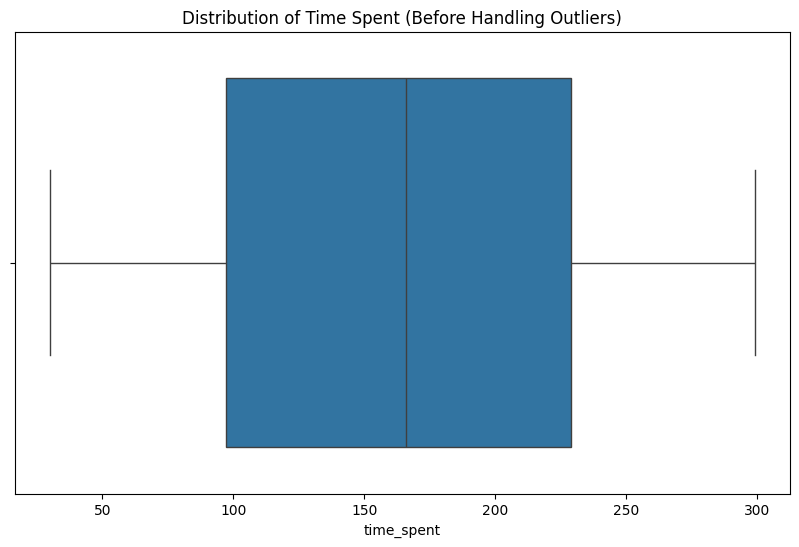

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'time_spent' before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['time_spent'])
plt.title('Distribution of Time Spent (Before Handling Outliers)')
plt.show()

TBH we don't need to do more analysist since no outlier, but just do it

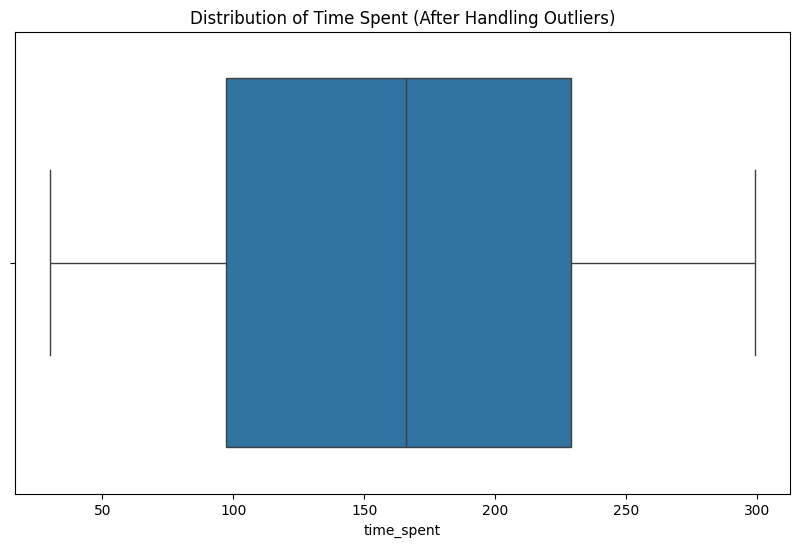

In [31]:
# Define a function to handle outliers using IQR (Interquartile Range)
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))

# Handle outliers in 'time_spent'
handle_outliers(df, 'time_spent')

# Visualize the distribution of 'time_spent' after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['time_spent'])
plt.title('Distribution of Time Spent (After Handling Outliers)')
plt.show()

##Model Development

###Build a predictive model that can forecast the next product a customer is likely to purchase.

In [34]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162682 sha256=2ef8d52272544621ac2c6c05835148ba60c40489095ec3a183764e59bfc8e947
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [35]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise.dump import dump, load

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['customer_id', 'product_id', 'ratings']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the KNNBasic collaborative filtering algorithm
sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options)

# Train the algorithm on the training set
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [36]:
# Save the model to a file
model_file_path = 'knn_model.pkl'
dump(model_file_path, algo=algo)
print(f"Model saved to {model_file_path}")

# Specify the file path where the model is saved
loaded_model_path = 'knn_model.pkl'

# Load the model from the file
loaded_data, loaded_algo = load(loaded_model_path)
print("Model loaded successfully")

Model saved to knn_model.pkl
Model loaded successfully


In [37]:
def get_top_n_recommendations(model, user_id, n=5):
    # Check if the user ID is in the dataset
    if user_id not in df['customer_id'].unique():
        print(f"No data available for customer with ID {user_id}. Please check if the customer has provided ratings.")
        return

    # Get a list of all product IDs
    all_products = df['product_id'].unique()

    # Get the products the user has already purchased
    purchased_products = df[df['customer_id'] == user_id]['product_id'].tolist()

    # Remove the purchased products from the list
    to_predict = [prod for prod in all_products if prod not in purchased_products]

    # Check if there are items to predict
    if not to_predict:
        print(f"No products available for recommendation for customer with ID {user_id}.")
        return

    # Predict ratings for products that the user has not purchased
    predictions = [loaded_algo.predict(user_id, prod) for prod in to_predict]

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Display the top N recommended products
    top_n_recommendations = predictions[:n]
    if not top_n_recommendations:
        print(f"No recommendations available for customer with ID {user_id}. Please check if the customer has provided ratings.")
    else:
        print(f"Top {n} recommended products for customer with ID {user_id}:")
        for recommendation in top_n_recommendations:
            print(f"Product ID: {recommendation.iid}, Estimated Rating: {recommendation.est}")


In [38]:
# Get the customer ID from the user
user_id_input = int(input("Enter customer ID: "))

# Specify the number of recommendations (top N)
top_n_input = int(input("Enter the number of recommendations (top N): "))

# Get top N recommended products for the input customer ID
get_top_n_recommendations(loaded_algo, user_id_input, n=top_n_input)

Enter customer ID: 1
Enter the number of recommendations (top N): 30
Top 30 recommended products for customer with ID 1:
Product ID: 145, Estimated Rating: 4.6
Product ID: 186, Estimated Rating: 4.533210656812437
Product ID: 173, Estimated Rating: 4.532461781527849
Product ID: 144, Estimated Rating: 4.481198521207116
Product ID: 176, Estimated Rating: 4.426295761589994
Product ID: 155, Estimated Rating: 4.399821903598524
Product ID: 125, Estimated Rating: 4.386100194978747
Product ID: 130, Estimated Rating: 4.365472521556714
Product ID: 167, Estimated Rating: 4.356375209679268
Product ID: 114, Estimated Rating: 4.310075808022778
Product ID: 195, Estimated Rating: 4.300644142591009
Product ID: 171, Estimated Rating: 4.300181731923829
Product ID: 198, Estimated Rating: 4.289508465778414
Product ID: 161, Estimated Rating: 4.271116013604419
Product ID: 132, Estimated Rating: 4.268234672734748
Product ID: 197, Estimated Rating: 4.217796880819209
Product ID: 122, Estimated Rating: 4.19934701

In [39]:
from surprise import accuracy

# Make predictions on the test set
predictions = loaded_algo.test(testset)

# Evaluate the model using MSE and RMSE
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


MSE: 0.3845
RMSE: 0.6201
Mean Squared Error (MSE): 0.3844762341360998
Root Mean Squared Error (RMSE): 0.6200614760941853


###Grid Search for Improving Model

In [40]:
from surprise.model_selection import GridSearchCV

# Specify the parameter grid to search
param_grid = {'k': [20, 30, 40], 'sim_options': {'name': ['cosine', 'pearson']}}

# Choose the algorithm
algorithm = KNNBasic

# Create GridSearchCV object
grid_search = GridSearchCV(algorithm, param_grid, measures=['rmse'], cv=3)

# Fit the model with the training data
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_algo = algorithm(k=best_params['k'], sim_options=best_params['sim_options'])
best_algo.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

In [41]:
from surprise import accuracy

# Train the model with the best parameters
best_algo.fit(trainset)

# Make predictions on the test set
predictions = best_algo.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6201
MSE: 0.3845
Root Mean Squared Error (RMSE): 0.6200614760941853
Mean Squared Error (MSE): 0.3844762341360998


###With SVD

In [49]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

# Define the Reader with the appropriate rating scale
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(df[['customer_id', 'product_id', 'ratings']], reader)

# Create an SVD model
svd_model = SVD()
trainset = data.build_full_trainset()
svd_model.fit(trainset)

In [50]:
from joblib import dump, load

In [51]:
# Save the entire SVD model to a file
model_file_path = '/content/svd_model.joblib'
dump(svd_model, model_file_path)
print(f"SVD model saved to {model_file_path}")

# Load the SVD model from the file
loaded_svd_model = load('/content/svd_model.joblib')
print("SVD Model loaded successfully")

# Verify the loaded model
print(loaded_svd_model)

SVD model saved to /content/svd_model.joblib
SVD Model loaded successfully


In [52]:
def get_top_n_recommendations(model, user_id, n=5):
    # Check if the user ID is in the dataset
    if user_id not in df['customer_id'].unique():
        print(f"No data available for customer with ID {user_id}. Please check if the customer has provided ratings.")
        return

    # Get a list of all product IDs
    all_products = df['product_id'].unique()

    # Get the products the user has already purchased
    purchased_products = df[df['customer_id'] == user_id]['product_id'].tolist()

    # Remove the purchased products from the list
    to_predict = [prod for prod in all_products if prod not in purchased_products]

    # Check if there are items to predict
    if not to_predict:
        print(f"No products available for recommendation for customer with ID {user_id}.")
        return

    # Predict ratings for products that the user has not purchased
    predictions = [model.predict(user_id, prod) for prod in to_predict]

    # Debugging: Print the predictions
    print(predictions)

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Debugging: Print the sorted predictions
    print(predictions)

    # Display the top N recommended products
    top_n_recommendations = predictions[:n]
    if not top_n_recommendations:
        print(f"No recommendations available for customer with ID {user_id}. Please check if the customer has provided ratings.")
    else:
        print(f"Top {n} recommended products for customer with ID {user_id}:")
        for recommendation in top_n_recommendations:
            print(f"Product ID: {recommendation.iid}, Estimated Rating: {recommendation.est}")


In [53]:
# Get the customer ID from the user
user_id_input = int(input("Enter customer ID: "))

# Specify the number of recommendations (top N)
top_n_input = int(input("Enter the number of recommendations (top N): "))

# Get top N recommended products for the input customer ID using the loaded SVD model
get_top_n_recommendations(loaded_svd_model, user_id_input, n=top_n_input)

Enter customer ID: 10
Enter the number of recommendations (top N): 10
[Prediction(uid=10, iid=105, r_ui=None, est=3.9707473366996497, details={'was_impossible': False}), Prediction(uid=10, iid=102, r_ui=None, est=3.691620324551416, details={'was_impossible': False}), Prediction(uid=10, iid=103, r_ui=None, est=3.9903016920506844, details={'was_impossible': False}), Prediction(uid=10, iid=104, r_ui=None, est=3.7313539875502784, details={'was_impossible': False}), Prediction(uid=10, iid=167, r_ui=None, est=3.8570268302287998, details={'was_impossible': False}), Prediction(uid=10, iid=131, r_ui=None, est=3.952687829897497, details={'was_impossible': False}), Prediction(uid=10, iid=132, r_ui=None, est=4.0208495638690325, details={'was_impossible': False}), Prediction(uid=10, iid=142, r_ui=None, est=4.00641893250952, details={'was_impossible': False}), Prediction(uid=10, iid=143, r_ui=None, est=4.041809956263845, details={'was_impossible': False}), Prediction(uid=10, iid=196, r_ui=None, est=

In [54]:
# Perform cross-validation
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6024  0.6007  0.6233  0.6149  0.6276  0.6138  0.0108  
MAE (testset)     0.5161  0.5175  0.5259  0.5235  0.5398  0.5246  0.0085  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.60238942, 0.60070833, 0.62331682, 0.61489686, 0.62760605]),
 'test_mae': array([0.5161197 , 0.51745379, 0.52593248, 0.52351714, 0.53984165]),
 'fit_time': (0.012346506118774414,
  0.008922576904296875,
  0.009003162384033203,
  0.008937597274780273,
  0.009795665740966797),
 'test_time': (0.0017518997192382812,
  0.0010383129119873047,
  0.00096893310546875,
  0.0010845661163330078,
  0.001043558120727539)}

# **Conclusion**


```
In the comparison between the SVD (Singular Value Decomposition) and
KNN Basic models based on the evaluation metrics, it appears that
the SVD model has a higher RMSE (Root Mean Squared Error)
of approximately 0.6138, while the KNN Basic model has a lower RMSE of 0.6201.

The evaluation results are as follows:

SVD:

RMSE: 0.6138
MAE: 0.5246
Fit Time: 0.01 seconds (average)
Test Time: 0.00 seconds (average)
KNN Basic:

RMSE: 0.6201
MSE: 0.3845
Fit Time: Not explicitly provided
Test Time: Not explicitly provided

Given these results, the KNN Basic model has a slightly lower RMSE compared
to the SVD model. Generally, a lower RMSE indicates better predictive performance.
However, the choice between models depends on the specific context and requirements of application.

Considerations for choosing a model:

1. RMSE:

Lower RMSE suggests better accuracy.
In this case, the KNN Basic model has a slightly lower RMSE,
indicating better performance in terms of prediction errors.

2. MAE:

Mean Absolute Error (MAE) is another metric to consider.
Evaluate both RMSE and MAE to ensure robust performance
across different error metrics.

3. Computational Efficiency:

Consider the computational efficiency of the models.
SVD seems to have consistently low fit and test times.

3. Model Interpretability:

Consider the interpretability of the models.
SVD, being a matrix factorization technique,
might provide more interpretable latent factors.

4. Scalability:

Consider the scalability of the models for larger datasets.
KNN methods may face scalability challenges as the dataset grows.

5. Context-Specific Considerations:

Consider any specific requirements or constraints in the application.
The choice between models may depend on the specific characteristics
of the dataset and the goals of recommendation system.

In conclusion, while the KNN Basic model has a slightly lower RMSE,
the decision to choose one model over the other depends on a combination of factors,
including accuracy, computational efficiency, interpretability, and specific
application requirements.

Since I think computational efficiency and interpretability are crucial,
I choose SVD as reasonable choice.

However, if the goal is to minimize prediction errors, the KNN Basic model
could be preferred.

```